## Breast Cancer ML Project

This notebook covers the exploratory analysis, feature selection and ML development for the breast cancer dataset.

# Setting up

In [2]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import scipy
from scipy.stats import pearsonr

In [3]:
# import sklearn
import sklearn
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold

In [124]:
# pandas settings
pd.set_option('display.max_columns', 999)

In [125]:
df = pd.read_excel('TrainDataset2023.xls')

In [126]:
df.head()

,ID,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,TRG002174,1,144.0,41.0,0,0,0,1,3,3,1,1,2,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263,-0.163500,0.708860,2897.68930,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.68930,0.670

In [127]:
df.shape

(400, 120)

- 120 features, feature selection will definitely be needed
- alongside feature engineering
- Could look at exploring null values and outliers in the dataset
- as well as how spread out the dataset is. 

In [128]:
columns = df.columns.tolist()
columns

['ID',
 'pCR (outcome)',
 'RelapseFreeSurvival (outcome)',
 'Age',
 'ER',
 'PgR',
 'HER2',
 'TrippleNegative',
 'ChemoGrade',
 'Proliferation',
 'HistologyType',
 'LNStatus',
 'TumourStage',
 'original_shape_Elongation',
 'original_shape_Flatness',
 'original_shape_LeastAxisLength',
 'original_shape_MajorAxisLength',
 'original_shape_Maximum2DDiameterColumn',
 'original_shape_Maximum2DDiameterRow',
 'original_shape_Maximum2DDiameterSlice',
 'original_shape_Maximum3DDiameter',
 'original_shape_MeshVolume',
 'original_shape_MinorAxisLength',
 'original_shape_Sphericity',
 'original_shape_SurfaceArea',
 'original_shape_SurfaceVolumeRatio',
 'original_shape_VoxelVolume',
 'original_firstorder_10Percentile',
 'original_firstorder_90Percentile',
 'original_firstorder_Energy',
 'original_firstorder_Entropy',
 'original_firstorder_InterquartileRange',
 'original_firstorder_Kurtosis',
 'original_firstorder_Maximum',
 'original_firstorder_MeanAbsoluteDeviation',
 'original_firstorder_Mean',
 'or

In [129]:
# group the data by its column name. Could do ML models with each one to see how it links. could do feature selection with these column collections.
original_shape = [item for item in columns if item.startswith("original_shape")]
original_fo = [item for item in columns if item.startswith("original_first")]
original_glcm = [item for item in columns if item.startswith("original_glcm")]
original_gldm = [item for item in columns if item.startswith("original_gldm")]
original_glrlm = [item for item in columns if item.startswith("original_glrlm")]
original_glszm = [item for item in columns if item.startswith("original_glszm")]
original_ngtdm = [item for item in columns if item.startswith("original_ngtdm")]

In [130]:
# theres are the MRI-based features. Image-based. 107.
# df.drop(columns=original_shape, inplace=True)
# df.drop(columns=original_fo, inplace=True)
# df.drop(columns=original_glcm, inplace=True)
# df.drop(columns=original_gldm, inplace=True)
# df.drop(columns=original_glszm, inplace=True)
# df.drop(columns=original_ngtdm, inplace=True)
# df.drop(columns=original_glrlm, inplace=True)

In [131]:
# leaves us with the 10 clinical features (very important)
df.head()

,ID,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,TRG002174,1,144.0,41.0,0,0,0,1,3,3,1,1,2,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263,-0.163500,0.708860,2897.68930,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.68930,0.670

In [132]:
df['HistologyType'].value_counts()

HistologyType
1      338
2       59
999      3
Name: count, dtype: int64

In [133]:
# replace 999 with np nan
df.replace(999, np.nan, inplace=True)

In [134]:
df = df.drop('ID', axis=1)

In [135]:
df

,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,1.0,144.000000,41.0,0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,2,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263,-0.163500,0.708860,2897.689300,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.68

In [136]:
df.isnull().sum()

pCR (outcome)                    5
RelapseFreeSurvival (outcome)    0
Age                              0
ER                               0
PgR                              1
                                ..
original_ngtdm_Busyness          0
original_ngtdm_Coarseness        0
original_ngtdm_Complexity        0
original_ngtdm_Contrast          0
original_ngtdm_Strength          0
Length: 119, dtype: int64

Not too many null values, which suggests that simple imputer can solve this without making a huge impact on the dataset

In [137]:
from sklearn.impute import SimpleImputer

# using the mean
imputer = SimpleImputer(strategy='mean')

df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# we should delete the rows that dont have pCR outcome

In [138]:
df_imputed.isnull().sum()

pCR (outcome)                    0
RelapseFreeSurvival (outcome)    0
Age                              0
ER                               0
PgR                              0
                                ..
original_ngtdm_Busyness          0
original_ngtdm_Coarseness        0
original_ngtdm_Complexity        0
original_ngtdm_Contrast          0
original_ngtdm_Strength          0
Length: 119, dtype: int64

In [139]:
df = df_imputed

# Exploratory Data Analysis

In [140]:
# take out regression before you turn everything else into int
rfs = df['RelapseFreeSurvival (outcome)'] # regression

In [141]:
df.head()

,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,1.0,144.0,41.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,2.0,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263.0,-0.163500,0.708860,2897.68930,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.68

In [142]:
df['Age'] = df['Age'].astype(int)
df['pCR (outcome)'] = df['pCR (outcome)'].astype(int)
# df = df.astype(int)

In [143]:
pcr = df['pCR (outcome)'] # classification
pcr

0      1
1      0
2      1
3      0
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: pCR (outcome), Length: 400, dtype: int64

In [ ]:
from scipy.stats import chi2_contingency

data = {'column':[],
        'Chi-square value':[],
        'P-value': []}

# Create contingency table
for column in df.columns:
    cont_table = pd.crosstab(df[column], df['pCR (outcome)'])
    chi2, p, dof, expected = chi2_contingency(cont_table)
    
    data['column'].append(column)
    data['Chi-square value'].append(round(chi2, 2))
    data['P-value'].append(p)
    
table = pd.DataFrame(data)
table.sort_values(by=["Chi-square value"], inplace = True) 
table.head(10)

<Axes: xlabel='ChemoGrade', ylabel='Age'>

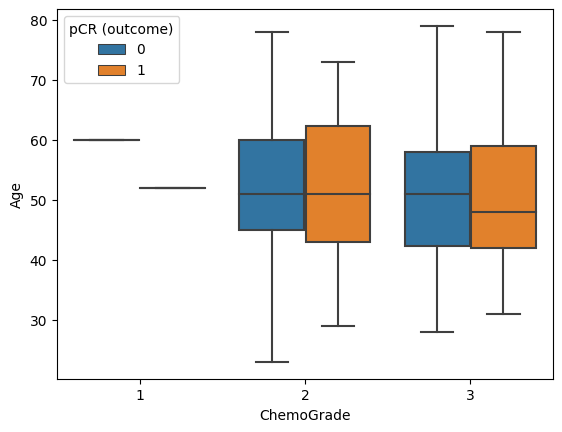

In [102]:
sns.boxplot(df,x='ChemoGrade',y='Age', hue='pCR (outcome)')

## pCR Analysis

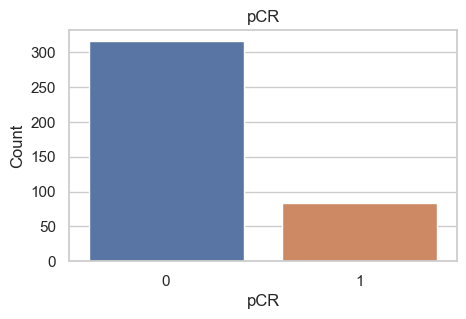

In [75]:
plt.figure(figsize=(5, 3))
sns.countplot(x='pCR (outcome)', data=df)

# Set plot labels and title
plt.xlabel('pCR')
plt.ylabel('Count')
plt.title('pCR')

# Show the plot
plt.show()

As mentioned in the brief, only 25% of patients receiving chemotherapy will achieve a PCR. Which means that we have a clear class imbalance here, where the model may be great at predicting no for pCR, but not as good as predicting yes, due to the fewer samples. Could also lead to a high false negative, where the model predicts most data as negative. 

Assigning weights might be a way to solve this. Or oversampling/undersampling. Or using multiple ML models.

## RFS analysis

In [76]:
from scipy.stats import skew

skewness = skew(rfs) # calculating skew for the rfs
print("Skewness:", skewness)

Skewness: 0.5167775981916344


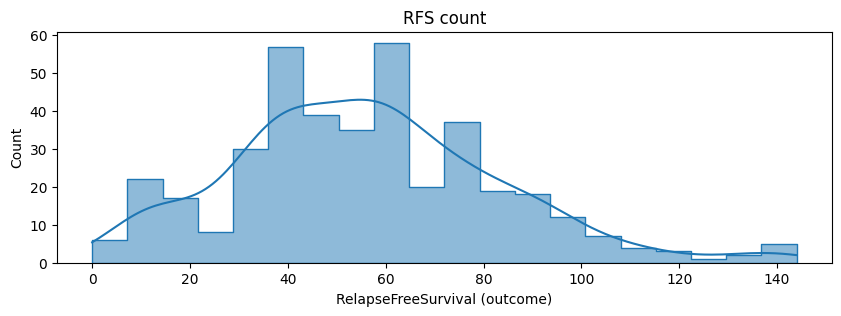

In [104]:
# plotting a histogram to see how the rfs is distributed.
plt.figure(figsize=(10, 3))
sns.histplot(x='RelapseFreeSurvival (outcome)', data=df, bins=20, kde='line', element='step')

# Set plot labels and title
plt.xlabel('RelapseFreeSurvival (outcome)')
plt.ylabel('Count')
plt.title('RFS count')

# Show the plot
plt.show()

# plt.savefig("my_plot.png", format="png")

General insights:
- There's a fairly wide spread of RFS. Of course this is working with the int variation, which won't be as accurate in the model. E.g. the 0 is probably 0.3 or something. Though I would argue that 0 is barely a valid RFS. I need to double check what the data is meant to represent. We will assume days for now.
- More samples exist in the middle arnge between 30 and 60, which is important to note. Could be worth training a model on that specific sample.
- Perhaps we break down the samples and have an ML model trained on each segment (0 to 30, 31 to 60, 61 to 144).
- The skew is 0.5 indicating a right-skewed distribution. There may be some higher than average values, as most of them are towards the left hand side. 

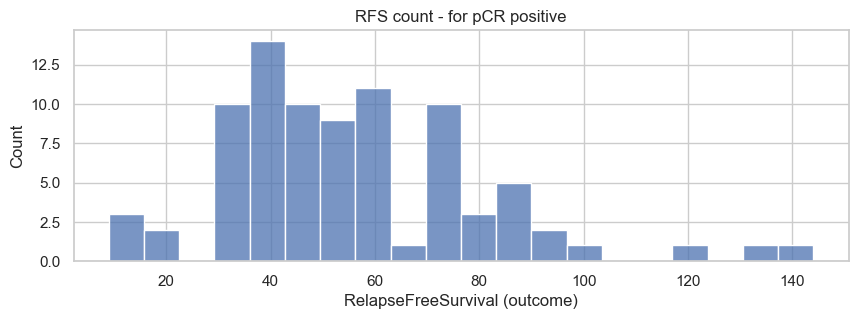

In [78]:
# looking at the distribution of rfs for the pCR positive patients
rfspos = df[df['pCR (outcome)'] == 1]

plt.figure(figsize=(10, 3))
sns.histplot(x='RelapseFreeSurvival (outcome)', data=rfspos, bins=20)

# Set plot labels and title
plt.xlabel('RelapseFreeSurvival (outcome)')
plt.ylabel('Count')
plt.title('RFS count - for pCR positive')

# Show the plot
plt.show()

## Age distribution

In [79]:
# to help with finding the age distribution
df['Age'] = df['Age'].astype(int)

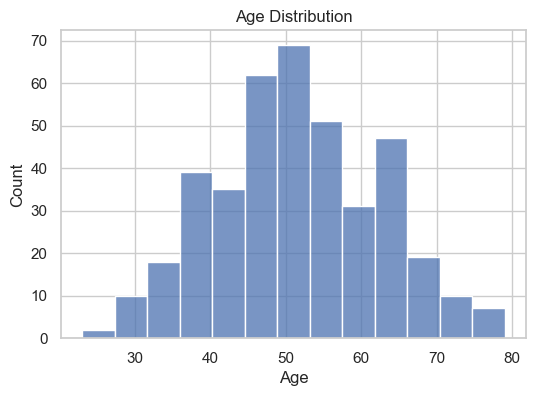

In [80]:
# Plot the age counts using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.histplot(x='Age', data=df)

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')

# Show the plot
plt.show()

General insights:
- Fairly even distribution, good curve, and understandably, more individuals within the ages of 45 and 55, with 22 people ages 48. I'm sure there's some sources that can back this up.
- Not a huge amount of representation on the younger end (23 to 33) which might have an effect on the model.
- Youngest is 23, oldest is 79.

## ER, PgR and HER2

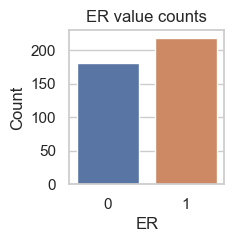

In [81]:
plt.figure(figsize=(2, 2))
sns.countplot(x='ER', data=df)

# Set plot labels and title
plt.xlabel('ER')
plt.ylabel('Count')
plt.title('ER value counts')

# Show the plot
plt.show()

More ER-positive patients than ER-negative. Not by a huge amount.

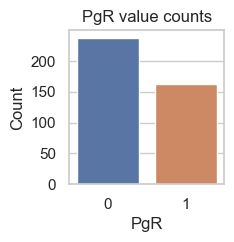

In [82]:
plt.figure(figsize=(2, 2))
sns.countplot(x='PgR', data=df)

# Set plot labels and title
plt.xlabel('PgR')
plt.ylabel('Count')
plt.title('PgR value counts')

# Show the plot
plt.show()

More PgR-negative patients than positive.

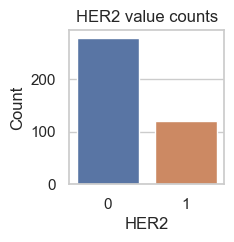

In [83]:
plt.figure(figsize=(2, 2))
sns.countplot(x='HER2', data=df)

# Set plot labels and title
plt.xlabel('HER2')
plt.ylabel('Count')
plt.title('HER2 value counts')

# Show the plot
plt.show()

Significantly more HER2-negative than positive.

## TrippleNegative

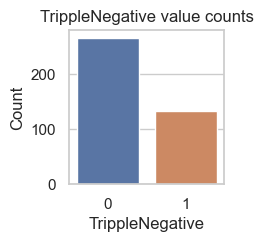

In [84]:
plt.figure(figsize=(2, 2))
sns.countplot(x='TrippleNegative', data=df)

# Set plot labels and title
plt.xlabel('TrippleNegative')
plt.ylabel('Count')
plt.title('TrippleNegative value counts')

# Show the plot
plt.show()

Significantly more negative than positive.

## ChemoGrade

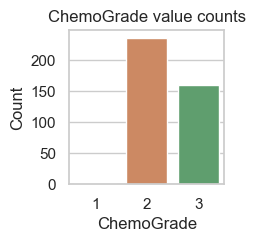

In [85]:
plt.figure(figsize=(2, 2))
sns.countplot(x='ChemoGrade', data=df)

# Set plot labels and title
plt.xlabel('ChemoGrade')
plt.ylabel('Count')
plt.title('ChemoGrade value counts')

# Show the plot
plt.show()

Class 1 barely exists, probably only 1 or 2 patients. 2 is much larger than 3.

## Proliferation

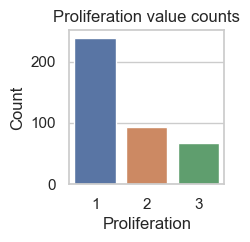

In [86]:
plt.figure(figsize=(2, 2))
sns.countplot(x='Proliferation', data=df)

# Set plot labels and title
plt.xlabel('Proliferation')
plt.ylabel('Count')
plt.title('Proliferation value counts')

# Show the plot
plt.show()

A lot more 1 than 2 and 3.

## HistologyType

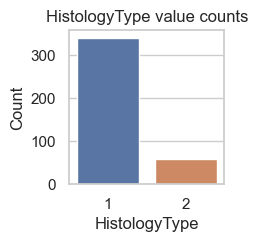

In [87]:
plt.figure(figsize=(2, 2))
sns.countplot(x='HistologyType', data=df)

# Set plot labels and title
plt.xlabel('HistologyType')
plt.ylabel('Count')
plt.title('HistologyType value counts')

# Show the plot
plt.show()

A lot more 1 than 2.

## LNStatus

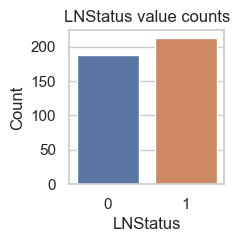

In [88]:
plt.figure(figsize=(2, 2))
sns.countplot(x='LNStatus', data=df)

# Set plot labels and title
plt.xlabel('LNStatus')
plt.ylabel('Count')
plt.title('LNStatus value counts')

# Show the plot
plt.show()

Almost even split.

## TumourStage

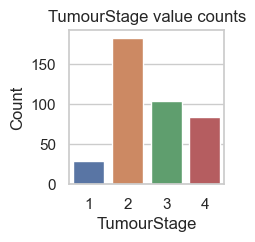

In [89]:
plt.figure(figsize=(2, 2))
sns.countplot(x='TumourStage', data=df)

# Set plot labels and title
plt.xlabel('TumourStage')
plt.ylabel('Count')
plt.title('TumourStage value counts')

# Show the plot
plt.show()

I'll have to check later what they correspond to. Not many 1, but a lot of 2 and a few 3 and 4

# Correlations and Relationships

In [90]:
corr = df.corr()
# corr

Notes:
- ER and PgR have a very strong positive correlation 0.69.
- PgR has a strong negative correlation with TrippleNegative
- TrippleNegative has a strong negative correlation with ER
- HER2 has a weak positive correlation with pCR. 
- ChemoGrade and Proliferation have a strong positive relationship. 0.83.

<Axes: >

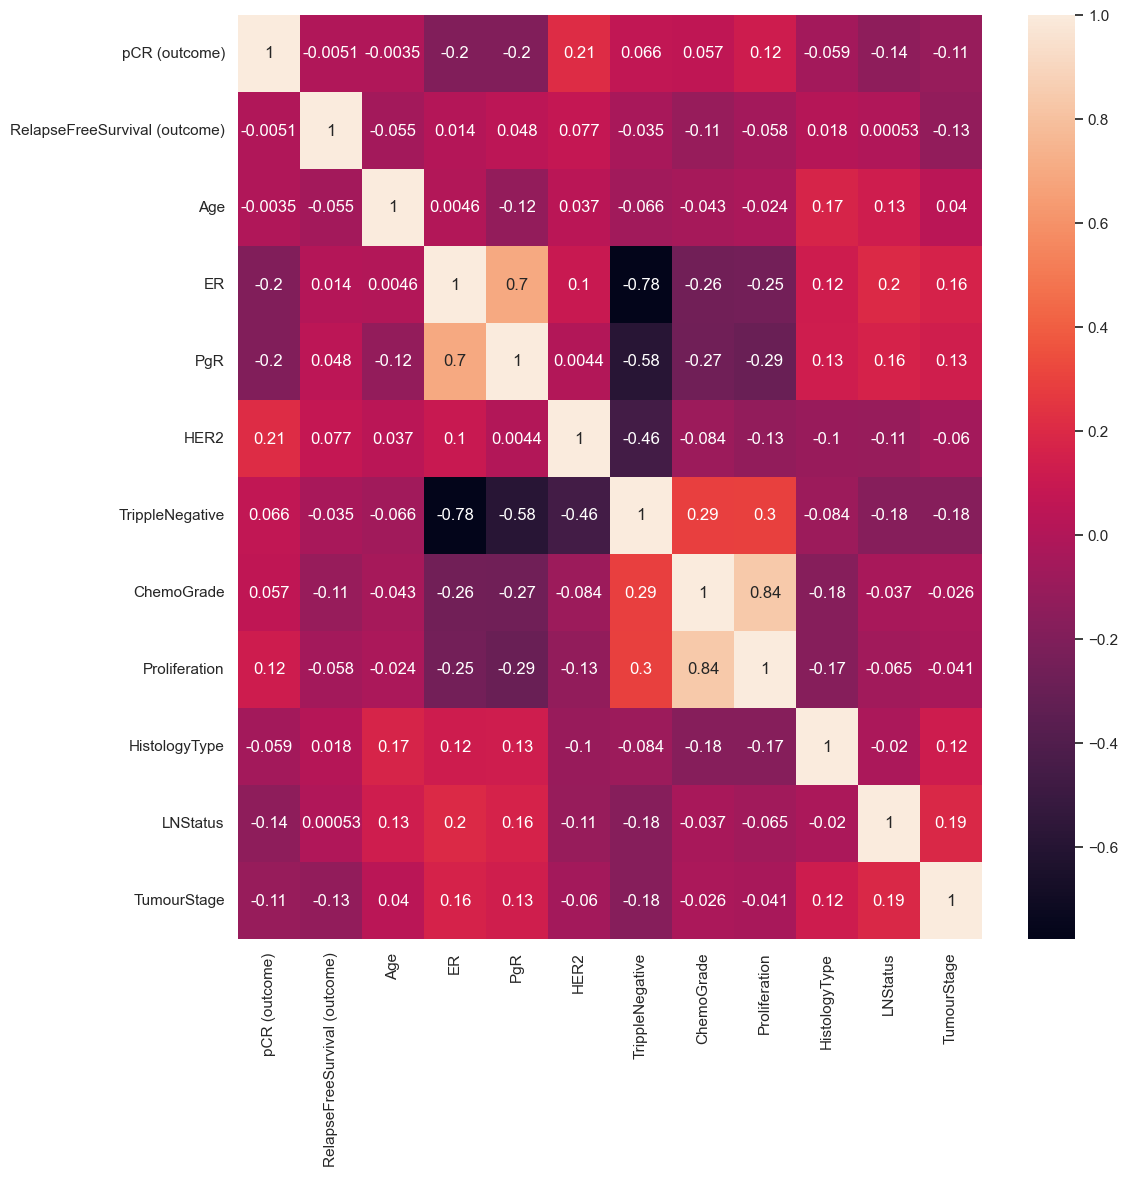

In [91]:
# helps us to represent the correlations visually. 
# can clearly se the strong negative correlation with TrippleNegative and ER
# and the positive correlation with ChemoGrade and Proliferation
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True)

<Axes: xlabel='Age', ylabel='RelapseFreeSurvival (outcome)'>

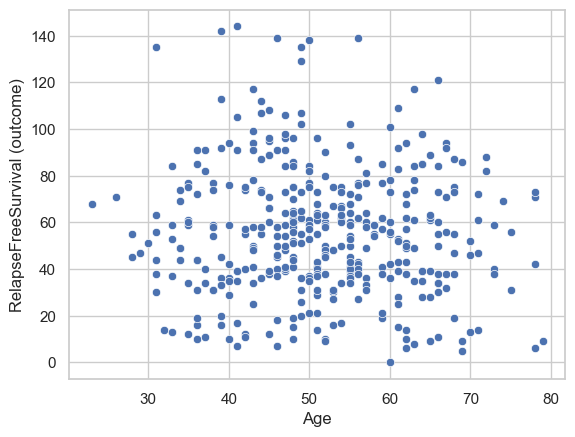

In [92]:
sns.scatterplot(data=df, x="Age", y="RelapseFreeSurvival (outcome)")

No correlation at all between age and RFS.

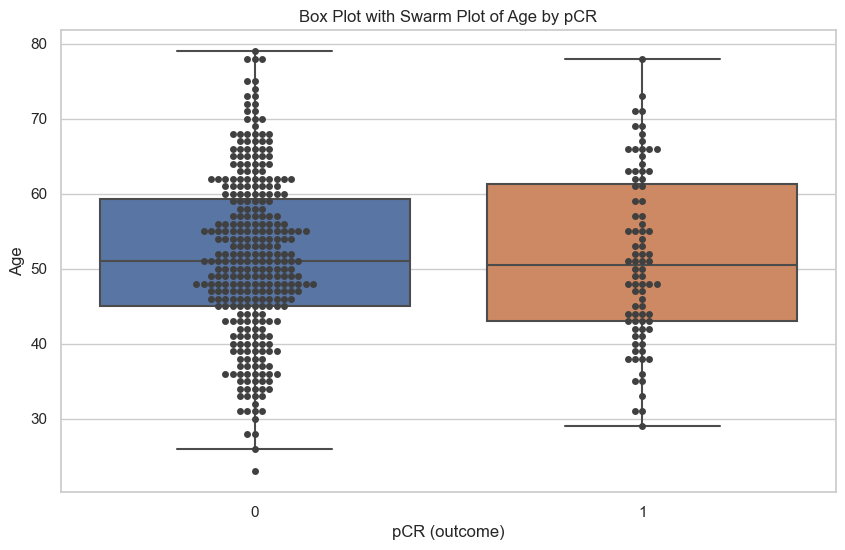

In [93]:
# box and swarm plot with age against pCR
plt.figure(figsize=(10, 6))
sns.boxplot(x='pCR (outcome)', y='Age', data=df, showfliers=False)
sns.swarmplot(x='pCR (outcome)', y='Age', data=df, color=".25")
plt.title('Box Plot with Swarm Plot of Age by pCR')
plt.show()

A bit more of a IQR with the pCR positive patients.

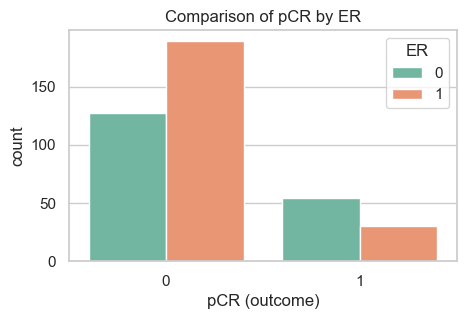

In [94]:
# plot pCR against ER
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x="pCR (outcome)", hue="ER", palette="Set2")
plt.title('Comparison of pCR by ER')
plt.show()

- There's a lot more people who are ER-positive that are pCR-negative.
- Most people who are pCR-positive are ER-negative, which links to the weak negative correlation between each other

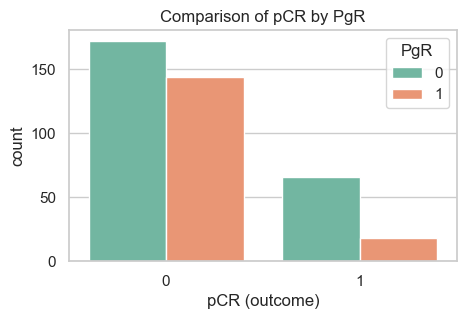

In [95]:
# plot pCR against PgR
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x="pCR (outcome)", hue="PgR", palette="Set2")
plt.title('Comparison of pCR by PgR')
plt.show()

- Most people who are pCR positive, are PgR negative
- There's a good enough sample of PgR positive and negative for pCR-negative patients

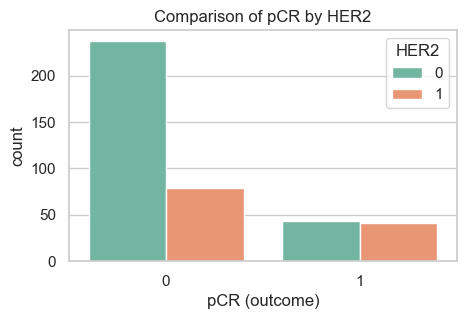

In [96]:
# plot pCR against HER2
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x="pCR (outcome)", hue="HER2", palette="Set2")
plt.title('Comparison of pCR by HER2')
plt.show()

- Most people who are pCR negative are also HER2 negative
- There's almost an equal number of HER2 positive and negative in the pCR-positive class

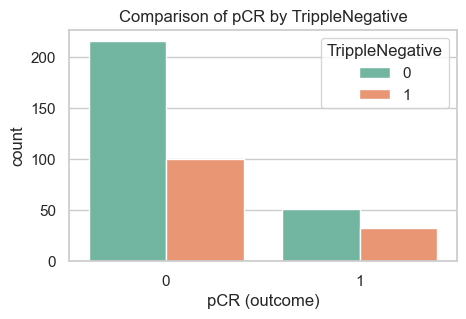

In [97]:
# plot pCR against TrippleNegative
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x="pCR (outcome)", hue="TrippleNegative", palette="Set2")
plt.title('Comparison of pCR by TrippleNegative')
plt.show()

- Most patients who are pCR negative are also TrippleNegative-negative
- There's more patients who are pCR positive that are TrippleNegative-negative

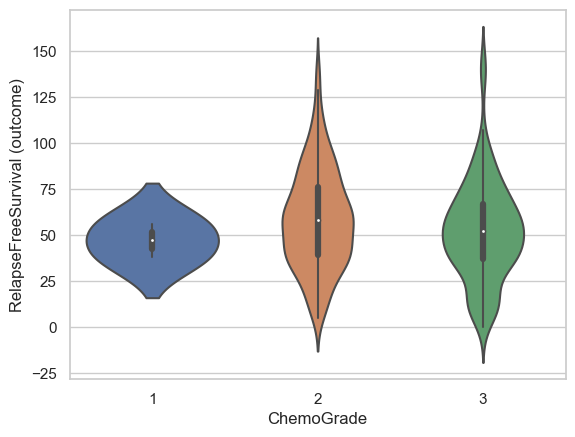

In [103]:
sns.violinplot(x='ChemoGrade', y='RelapseFreeSurvival (outcome)', data=df)
plt.show()

Within ChemoGrade 1, there's a most shorter range of RFS, but the range increases more in 2 and 3, with the median increasing in 2.

ValueError: Could not interpret input 'ER'

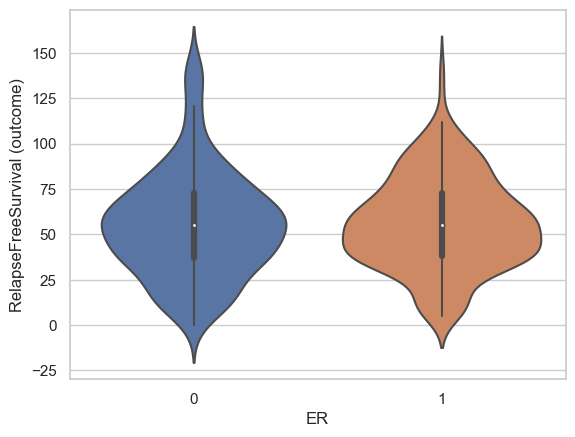

In [104]:
sns.violinplot(x='ER', y='RelapseFreeSurvival (outcome)', data=df)
plt.show()

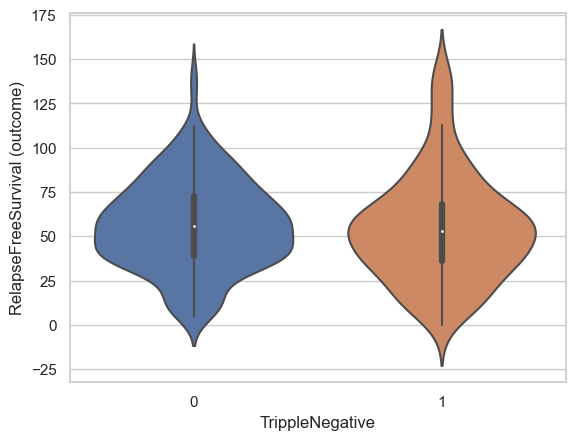

In [105]:
sns.violinplot(x='TrippleNegative', y='RelapseFreeSurvival (outcome)', data=df)
plt.show()

# Regression

In [144]:
df.head()

,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,1,144.0,41,0.0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,2.0,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263.0,-0.163500,0.708860,2897.68930,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.68930,

In [145]:
df.drop('pCR (outcome)',axis=1,inplace=True)
df.drop('RelapseFreeSurvival (outcome)',axis=1,inplace=True)

In [146]:
df.head()

,Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,41,0.0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,2.0,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263.0,-0.163500,0.708860,2897.68930,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.68930,0.670258,0.141574,3.328814,0.725849,-0.425324,0.4387

In [24]:
x_train, x_test, y_train, y_test = train_test_split(df, rfs, test_size=0.2, random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression

# initialize LR and train
lr =LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
# gather the intercept, which is where the value starts when all values are 0. Baseline.
intercept = lr.intercept_
intercept

86.38808977798638

In [31]:
# gather coefficients
age_slope = lr.coef_[0]
age_slope

-0.06639294867585656

In [32]:
cdf = pd.DataFrame(lr.coef_,df.columns,columns=['Coeff'])
cdf

,Coeff
Age,-0.066393
ER,-0.969560
PgR,4.085447
HER2,2.723278
TrippleNegative,0.555893
ChemoGrade,-8.427685
Proliferation,1.433637
HistologyType,0.028843
LNStatus,-0.984522
TumourStage,-4.387766


All the coefficients. A positive coefficent indicates positive correlation. A negative coefficent indicates negative correlation. 
- ChemoGrade has the most negative correlation with RFS
- PgR has the most positive correlation with RFS

In [33]:
# predict values from x_test
predictions = lr.predict(x_test)
predictions

array([64.24478829, 47.14459655, 49.76224978, 54.89482119, 62.21066723,
       53.18535169, 57.4131713 , 41.61409876, 53.43979888, 52.65420811,
       56.25100839, 45.25275448, 63.8874474 , 64.18053891, 43.63131021,
       53.46839438, 56.83717315, 54.93535983, 53.97094247, 60.71737821,
       60.10188204, 58.93614037, 53.36435789, 61.75265771, 53.50851557,
       54.95778866, 58.70296556, 52.45502926, 54.02828738, 51.81994244,
       43.36849038, 69.59170104, 52.52142221, 43.81911728, 56.43306624,
       54.04308464, 60.04123831, 61.62329729, 52.62456309, 46.42723058,
       52.52142221, 54.75860981, 52.38863631, 59.86839362, 58.68162562,
       58.27221089, 53.22051495, 53.79155825, 61.09777627, 56.71000981,
       52.5388931 , 56.36587095, 63.55548265, 53.87465733, 55.91314115,
       51.41094888, 53.16517905, 56.10685071, 50.75699064, 49.30156789,
       43.70045513, 51.30776116, 53.52690343, 56.87163838, 53.76271558,
       49.09832029, 61.3577255 , 61.31766671, 53.25857967, 47.22

Interesting that most of these values are within a range of 40 and 65. Not many range outside of that.

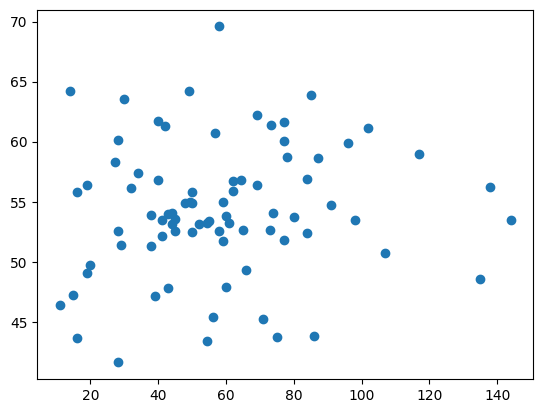

In [34]:
# plot the scatter of predictions against y_test
plt.scatter(y_test, predictions)

no correlation?

In [35]:
x_line = np.linspace(min(df['Age']), max(df['Age']), 100)
x_line

array([23.        , 23.56565657, 24.13131313, 24.6969697 , 25.26262626,
       25.82828283, 26.39393939, 26.95959596, 27.52525253, 28.09090909,
       28.65656566, 29.22222222, 29.78787879, 30.35353535, 30.91919192,
       31.48484848, 32.05050505, 32.61616162, 33.18181818, 33.74747475,
       34.31313131, 34.87878788, 35.44444444, 36.01010101, 36.57575758,
       37.14141414, 37.70707071, 38.27272727, 38.83838384, 39.4040404 ,
       39.96969697, 40.53535354, 41.1010101 , 41.66666667, 42.23232323,
       42.7979798 , 43.36363636, 43.92929293, 44.49494949, 45.06060606,
       45.62626263, 46.19191919, 46.75757576, 47.32323232, 47.88888889,
       48.45454545, 49.02020202, 49.58585859, 50.15151515, 50.71717172,
       51.28282828, 51.84848485, 52.41414141, 52.97979798, 53.54545455,
       54.11111111, 54.67676768, 55.24242424, 55.80808081, 56.37373737,
       56.93939394, 57.50505051, 58.07070707, 58.63636364, 59.2020202 ,
       59.76767677, 60.33333333, 60.8989899 , 61.46464646, 62.03

In [37]:
xline = [ int(x) for x in x_line ]

In [40]:
y_line = age_slope * x_line + intercept

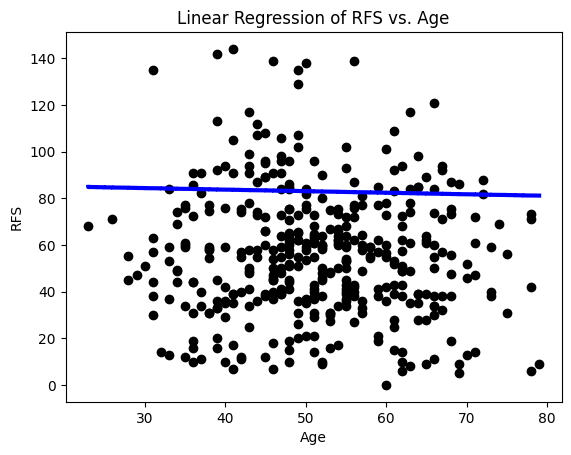

In [46]:
plt.scatter(df['Age'], rfs, color="black")
plt.plot(xline, y_line, color="blue", linewidth=3)

plt.title("Linear Regression of RFS vs. Age")
plt.xlabel("Age")
plt.ylabel("RFS")

plt.show()

Barely any correlation with age against rfs. Which makes sense as the coeff is negligble.

I don't think you can use scatter plots effectively with the rfs against binary values. But violin plots may be better.

# SVC

In [107]:
# import test set
testdf = pd.read_excel('TestDatasetExample.xls')

In [108]:
testdf

,ID,Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,TRG002728,56.881588,0,0,0,1,3,3,999,0,2,0.621404,0.520922,17.888663,34.340362,35.902646,27.294688,37.483330,38.131352,7764.833333,21.339254,0.669515,2832.340764,0.364765,7804,-0.104091,2.192586,15323.77638,0.535051,1.242465,2.488738,3.642128,0.705764,1.104510,1.157199,-1.120653,4.762781,0.518699,1.401278,-0.057312,15323.77638,0.785785,0.743636,3.694919,0.429992,-0.262247,0.2

In [109]:
# we need a better way to handle null values in the test set.
testdf.replace(999, 1, inplace=True)

In [147]:
# training SVC
x_train, x_test, y_train, y_test = train_test_split(df, pcr, test_size=0.2, random_state=42)

In [148]:
from sklearn.svm import SVC
clf = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', probability=True)
clf.fit(x_train, y_train)

SVC(gamma='auto', probability=True)

In [149]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [150]:
y_test

209    0
280    0
33     0
210    0
93     0
      ..
246    0
227    0
369    0
176    0
289    0
Name: pCR (outcome), Length: 80, dtype: int64

In [151]:
# calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(accuracy * 100, 2)}%')

Accuracy: 80.0%


In [153]:
# make sure to drop ID
testIDs = testdf['ID']

In [154]:
testdf.drop('ID',axis=1,inplace=True)

In [155]:
testy_pred = clf.predict(testdf)

In [156]:
testy_pred

array([0, 0, 0])

In [157]:
testIDs

0    TRG002728
1    TRG002649
2    TRG002628
Name: ID, dtype: object

In [158]:
results = pd.DataFrame({'ID': testIDs, 'pCR (outcome)': testy_pred})

In [159]:
results

,ID,pCR (outcome)
0,TRG002728,0
1,TRG002649,0
2,TRG002628,0


# Gradient boosting - feature importance

To gather feature importance, we can build a gradient boosting model and extract the important features from it. 

In [43]:
!pip install xgboost
import xgboost as xgb

In [48]:
pcr = list(map(int, pcr))

In [56]:
df = df.drop('pCR (outcome)', axis=1)

In [57]:
xtrain, xtest, ytrain, ytest = train_test_split(df, pcr, test_size=0.3)

In [58]:
model = xgb.XGBClassifier(max_depth=2)
model.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [59]:
ypred = model.predict(xtest)

In [60]:
print('Accuracy:', accuracy_score(ytest, ypred))

Accuracy: 0.75


In [61]:
importance_scores = model.feature_importances_
feature_names = xtrain.columns

In [62]:
indices = importance_scores.argsort()[::-1]
feature_names = [feature_names[idx] for idx in indices]
scores = importance_scores[indices]

In [66]:
rf_dict = dict(zip(feature_names, scores))

In [67]:
rf_dict

{'original_glcm_Imc2': 0.047887165,
 'original_gldm_LargeDependenceHighGrayLevelEmphasis': 0.03574696,
 'TrippleNegative': 0.032230318,
 'original_firstorder_InterquartileRange': 0.030223263,
 'original_glcm_ClusterProminence': 0.02625685,
 'original_firstorder_Energy': 0.024399547,
 'original_shape_MeshVolume': 0.023814695,
 'original_glrlm_GrayLevelNonUniformity': 0.023198768,
 'HER2': 0.023138389,
 'original_shape_SurfaceVolumeRatio': 0.021896472,
 'ER': 0.021276094,
 'original_gldm_LargeDependenceEmphasis': 0.02065181,
 'original_glrlm_GrayLevelNonUniformityNormalized': 0.019790106,
 'original_shape_LeastAxisLength': 0.019423194,
 'original_glszm_ZoneEntropy': 0.019325167,
 'original_firstorder_Median': 0.019188292,
 'original_glszm_LargeAreaHighGrayLevelEmphasis': 0.018864376,
 'Proliferation': 0.018780569,
 'original_glszm_GrayLevelNonUniformity': 0.01811443,
 'original_glrlm_RunLengthNonUniformityNormalized': 0.017227402,
 'original_firstorder_Range': 0.016866133,
 'original_gld

In [127]:
reversed_dict = {}
for key, value in rf_dict.items():
    reversed_dict.setdefault(value, []).append(key)

In [128]:
reversed_dict

{0.047887165: ['original_glcm_Imc2'],
 0.03574696: ['original_gldm_LargeDependenceHighGrayLevelEmphasis'],
 0.032230318: ['TrippleNegative'],
 0.030223263: ['original_firstorder_InterquartileRange'],
 0.02625685: ['original_glcm_ClusterProminence'],
 0.024399547: ['original_firstorder_Energy'],
 0.023814695: ['original_shape_MeshVolume'],
 0.023198768: ['original_glrlm_GrayLevelNonUniformity'],
 0.023138389: ['HER2'],
 0.021896472: ['original_shape_SurfaceVolumeRatio'],
 0.021276094: ['ER'],
 0.02065181: ['original_gldm_LargeDependenceEmphasis'],
 0.019790106: ['original_glrlm_GrayLevelNonUniformityNormalized'],
 0.019423194: ['original_shape_LeastAxisLength'],
 0.019325167: ['original_glszm_ZoneEntropy'],
 0.019188292: ['original_firstorder_Median'],
 0.018864376: ['original_glszm_LargeAreaHighGrayLevelEmphasis'],
 0.018780569: ['Proliferation'],
 0.01811443: ['original_glszm_GrayLevelNonUniformity'],
 0.017227402: ['original_glrlm_RunLengthNonUniformityNormalized'],
 0.016866133: ['o

{0.047887165: 1, 0.03574696: 1, 0.032230318: 1, 0.030223263: 1, 0.02625685: 1, 0.024399547: 1, 0.023814695: 1, 0.023198768: 1, 0.023138389: 1, 0.021896472: 1, 0.021276094: 1, 0.02065181: 1, 0.019790106: 1, 0.019423194: 1, 0.019325167: 1, 0.019188292: 1, 0.018864376: 1, 0.018780569: 1, 0.01811443: 1, 0.017227402: 1, 0.016866133: 1, 0.01666091: 1, 0.016599722: 1, 0.015273536: 1, 0.015210613: 1, 0.014913693: 1, 0.014317732: 1, 0.014252146: 1, 0.013869282: 1, 0.013643248: 1, 0.013459023: 1, 0.013319702: 1, 0.013040718: 1, 0.0128731225: 1, 0.012797787: 1, 0.012588594: 1, 0.011932245: 1, 0.011913796: 1, 0.011674072: 1, 0.01121239: 1, 0.011127309: 1, 0.011087465: 1, 0.0107429195: 1, 0.010552556: 1, 0.0104701435: 1, 0.010439639: 1, 0.010122436: 1, 0.009699596: 1, 0.009639827: 1, 0.009404632: 1, 0.009114276: 1, 0.0089974385: 1, 0.008540912: 1, 0.008436933: 1, 0.0076344735: 1, 0.007614506: 1, 0.007507709: 1, 0.0074541317: 1, 0.007303152: 1, 0.007279193: 1, 0.006179263: 1, 0.0060801734: 1, 0.0056

In [131]:
sorted_features = sorted(rf_dict, key=rf_dict.get)

bottom_44_features = sorted_features[:44]

print(bottom_44_features)

['ChemoGrade', 'HistologyType', 'original_firstorder_10Percentile', 'original_shape_MajorAxisLength', 'TumourStage', 'original_shape_VoxelVolume', 'original_ngtdm_Strength', 'original_firstorder_TotalEnergy', 'original_glcm_SumSquares', 'original_gldm_GrayLevelVariance', 'original_gldm_HighGrayLevelEmphasis', 'original_gldm_LowGrayLevelEmphasis', 'original_glrlm_GrayLevelVariance', 'original_glrlm_LongRunEmphasis', 'original_glrlm_LongRunHighGrayLevelEmphasis', 'original_glrlm_ShortRunHighGrayLevelEmphasis', 'original_glszm_GrayLevelVariance', 'original_glszm_HighGrayLevelZoneEmphasis', 'original_glszm_LargeAreaLowGrayLevelEmphasis', 'original_glszm_LowGrayLevelZoneEmphasis', 'original_glszm_SizeZoneNonUniformity', 'original_glszm_SmallAreaHighGrayLevelEmphasis', 'original_glszm_SmallAreaLowGrayLevelEmphasis', 'original_ngtdm_Complexity', 'original_gldm_DependenceEntropy', 'original_glcm_SumEntropy', 'original_firstorder_Uniformity', 'original_glcm_SumAverage', 'original_glcm_Autocorre

ValueError: list.remove(x): x not in list

In [132]:
list1 = set(sorted_features)
list2 = set(bottom_44_features)

list1.difference(list2)

print(list1)

{'original_firstorder_Median', 'original_glrlm_RunEntropy', 'HistologyType', 'PgR', 'LNStatus', 'original_glszm_SmallAreaLowGrayLevelEmphasis', 'original_glcm_MCC', 'original_gldm_DependenceEntropy', 'original_glrlm_RunPercentage', 'original_firstorder_Kurtosis', 'original_shape_MinorAxisLength', 'original_glszm_GrayLevelNonUniformityNormalized', 'original_shape_Flatness', 'original_glcm_DifferenceVariance', 'original_gldm_SmallDependenceEmphasis', 'original_glrlm_HighGrayLevelRunEmphasis', 'original_glrlm_GrayLevelVariance', 'original_glcm_DifferenceEntropy', 'original_glrlm_RunLengthNonUniformity', 'original_glszm_SizeZoneNonUniformityNormalized', 'original_shape_LeastAxisLength', 'original_glrlm_RunLengthNonUniformityNormalized', 'original_firstorder_Uniformity', 'original_gldm_DependenceVariance', 'original_firstorder_Minimum', 'original_glcm_ClusterTendency', 'original_glcm_SumEntropy', 'original_shape_VoxelVolume', 'original_shape_Sphericity', 'original_gldm_LowGrayLevelEmphasis'

In [133]:
feature_set = list(list1)

In [184]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(df[feature_set], pcr, test_size=0.3)

In [185]:
model = xgb.XGBClassifier(max_depth=2)
model.fit(xtrain1, ytrain1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [186]:
ypred1 = model.predict(xtest1)

In [187]:
print('Accuracy:', accuracy_score(ytest1, ypred1))

Accuracy: 0.8


Accuracy changes too much??

In [188]:
from sklearn.model_selection import cross_val_score

k_range = range(2,16)
k_scores = []
k_dict = {}
for k in k_range:
    model = xgb.XGBClassifier(max_depth=k)
    scores = cross_val_score(model, df[feature_set], pcr, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
    k_dict[k] = scores.mean()

key_with_highest_value = max(k_dict, key=lambda k: k_dict[k])

print(key_with_highest_value)

print(k_dict)

9
{2: 0.7475, 3: 0.77, 4: 0.7525000000000001, 5: 0.7675000000000001, 6: 0.775, 7: 0.7625, 8: 0.7625, 9: 0.7750000000000001, 10: 0.7750000000000001, 11: 0.7750000000000001, 12: 0.7750000000000001, 13: 0.7750000000000001, 14: 0.7750000000000001, 15: 0.7750000000000001}


In [111]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(df[top_10_features], pcr, test_size=0.3)

In [112]:
model = xgb.XGBClassifier(max_depth=2)
model.fit(xtrain1, ytrain1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [113]:
ypred1 = model.predict(xtest1)

In [114]:
print('Accuracy:', accuracy_score(ytest1, ypred1))

Accuracy: 0.7916666666666666


In [115]:
importance_scores1 = model.feature_importances_
feature_names1 = xtrain.columns

In [116]:
indices1 = importance_scores1.argsort()[::-1]
feature_names1 = [feature_names1[idx] for idx in indices1]
scores1 = importance_scores1[indices1]

IndexError: index 10 is out of bounds for axis 0 with size 10

<Axes: >

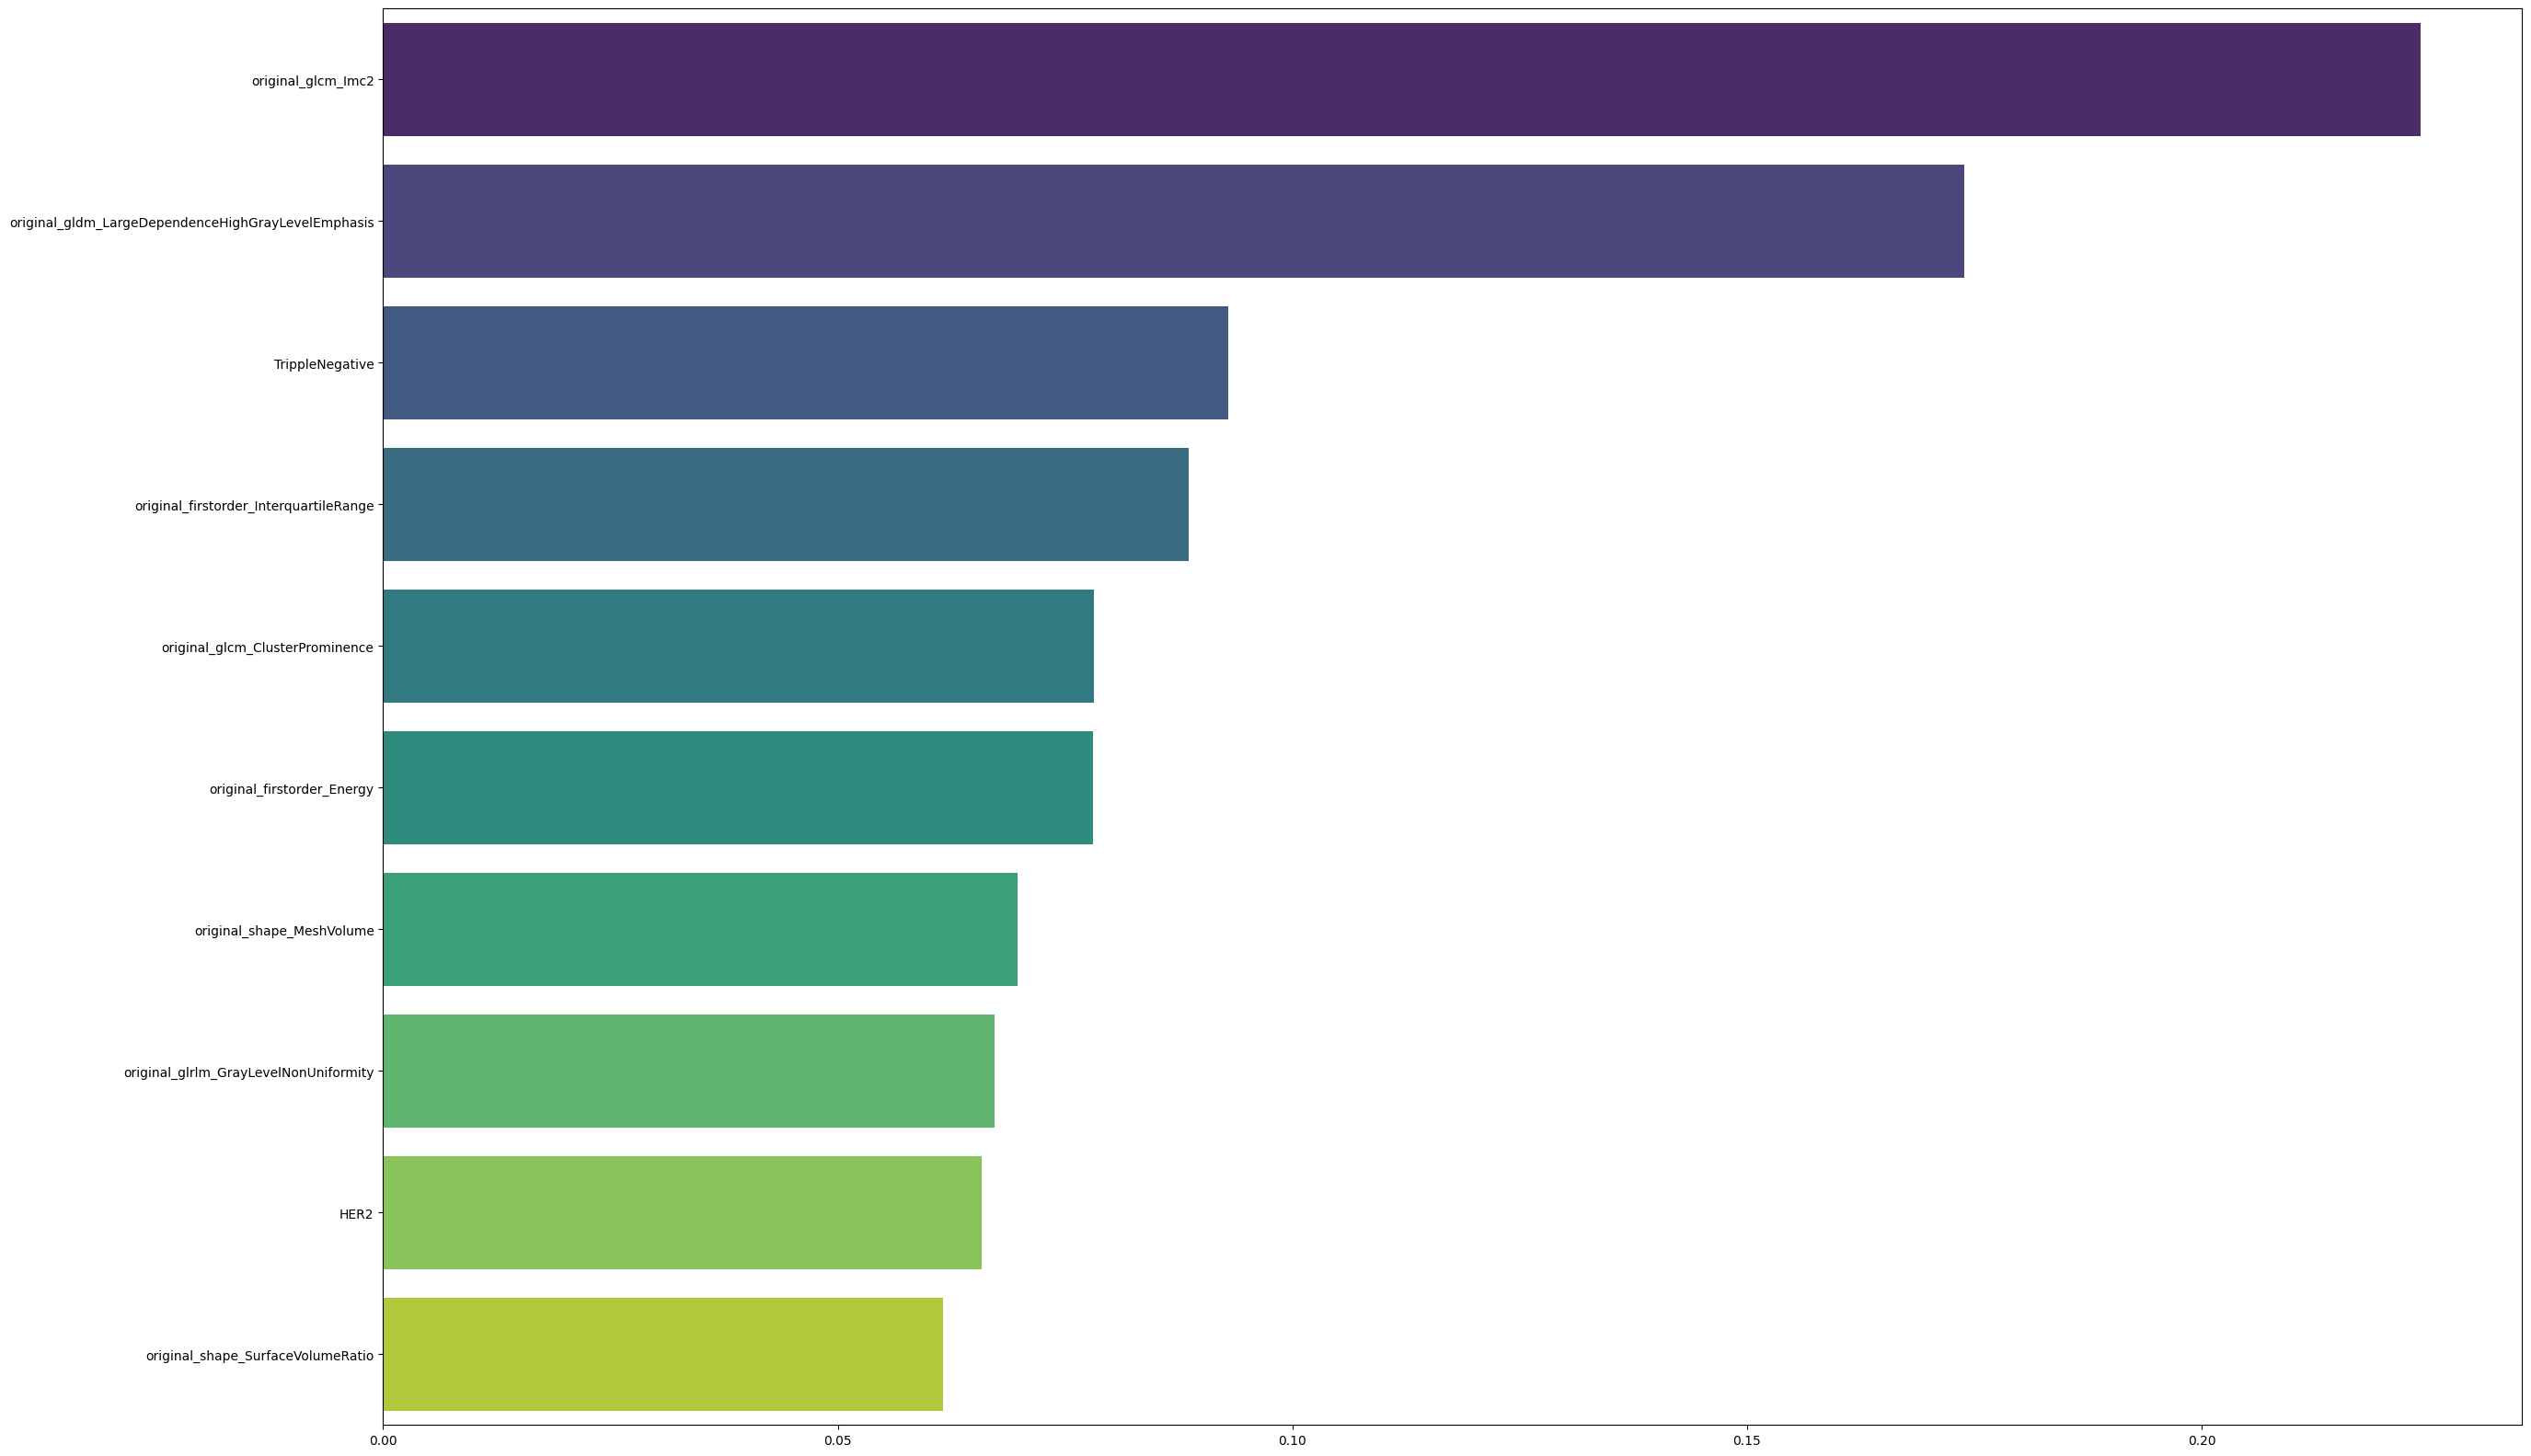

In [117]:
plt.figure(figsize=(30, 20))
sns.barplot(x=scores1, y=feature_names1, palette='viridis')

In [118]:
from sklearn.model_selection import cross_val_score

k_range = range(2,16)
k_scores = []
k_dict = {}
for k in k_range:
    model = xgb.XGBClassifier(max_depth=k)
    scores = cross_val_score(model, df[top_10_features], pcr, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
    k_dict[k] = scores.mean()

key_with_highest_value = max(k_dict, key=lambda k: k_dict[k])

print(key_with_highest_value)

print(k_dict)

2
{2: 0.76, 3: 0.7449999999999999, 4: 0.7549999999999999, 5: 0.7424999999999999, 6: 0.7575000000000001, 7: 0.75, 8: 0.74, 9: 0.7325, 10: 0.7375, 11: 0.73, 12: 0.73, 13: 0.73, 14: 0.73, 15: 0.73}


<Axes: >

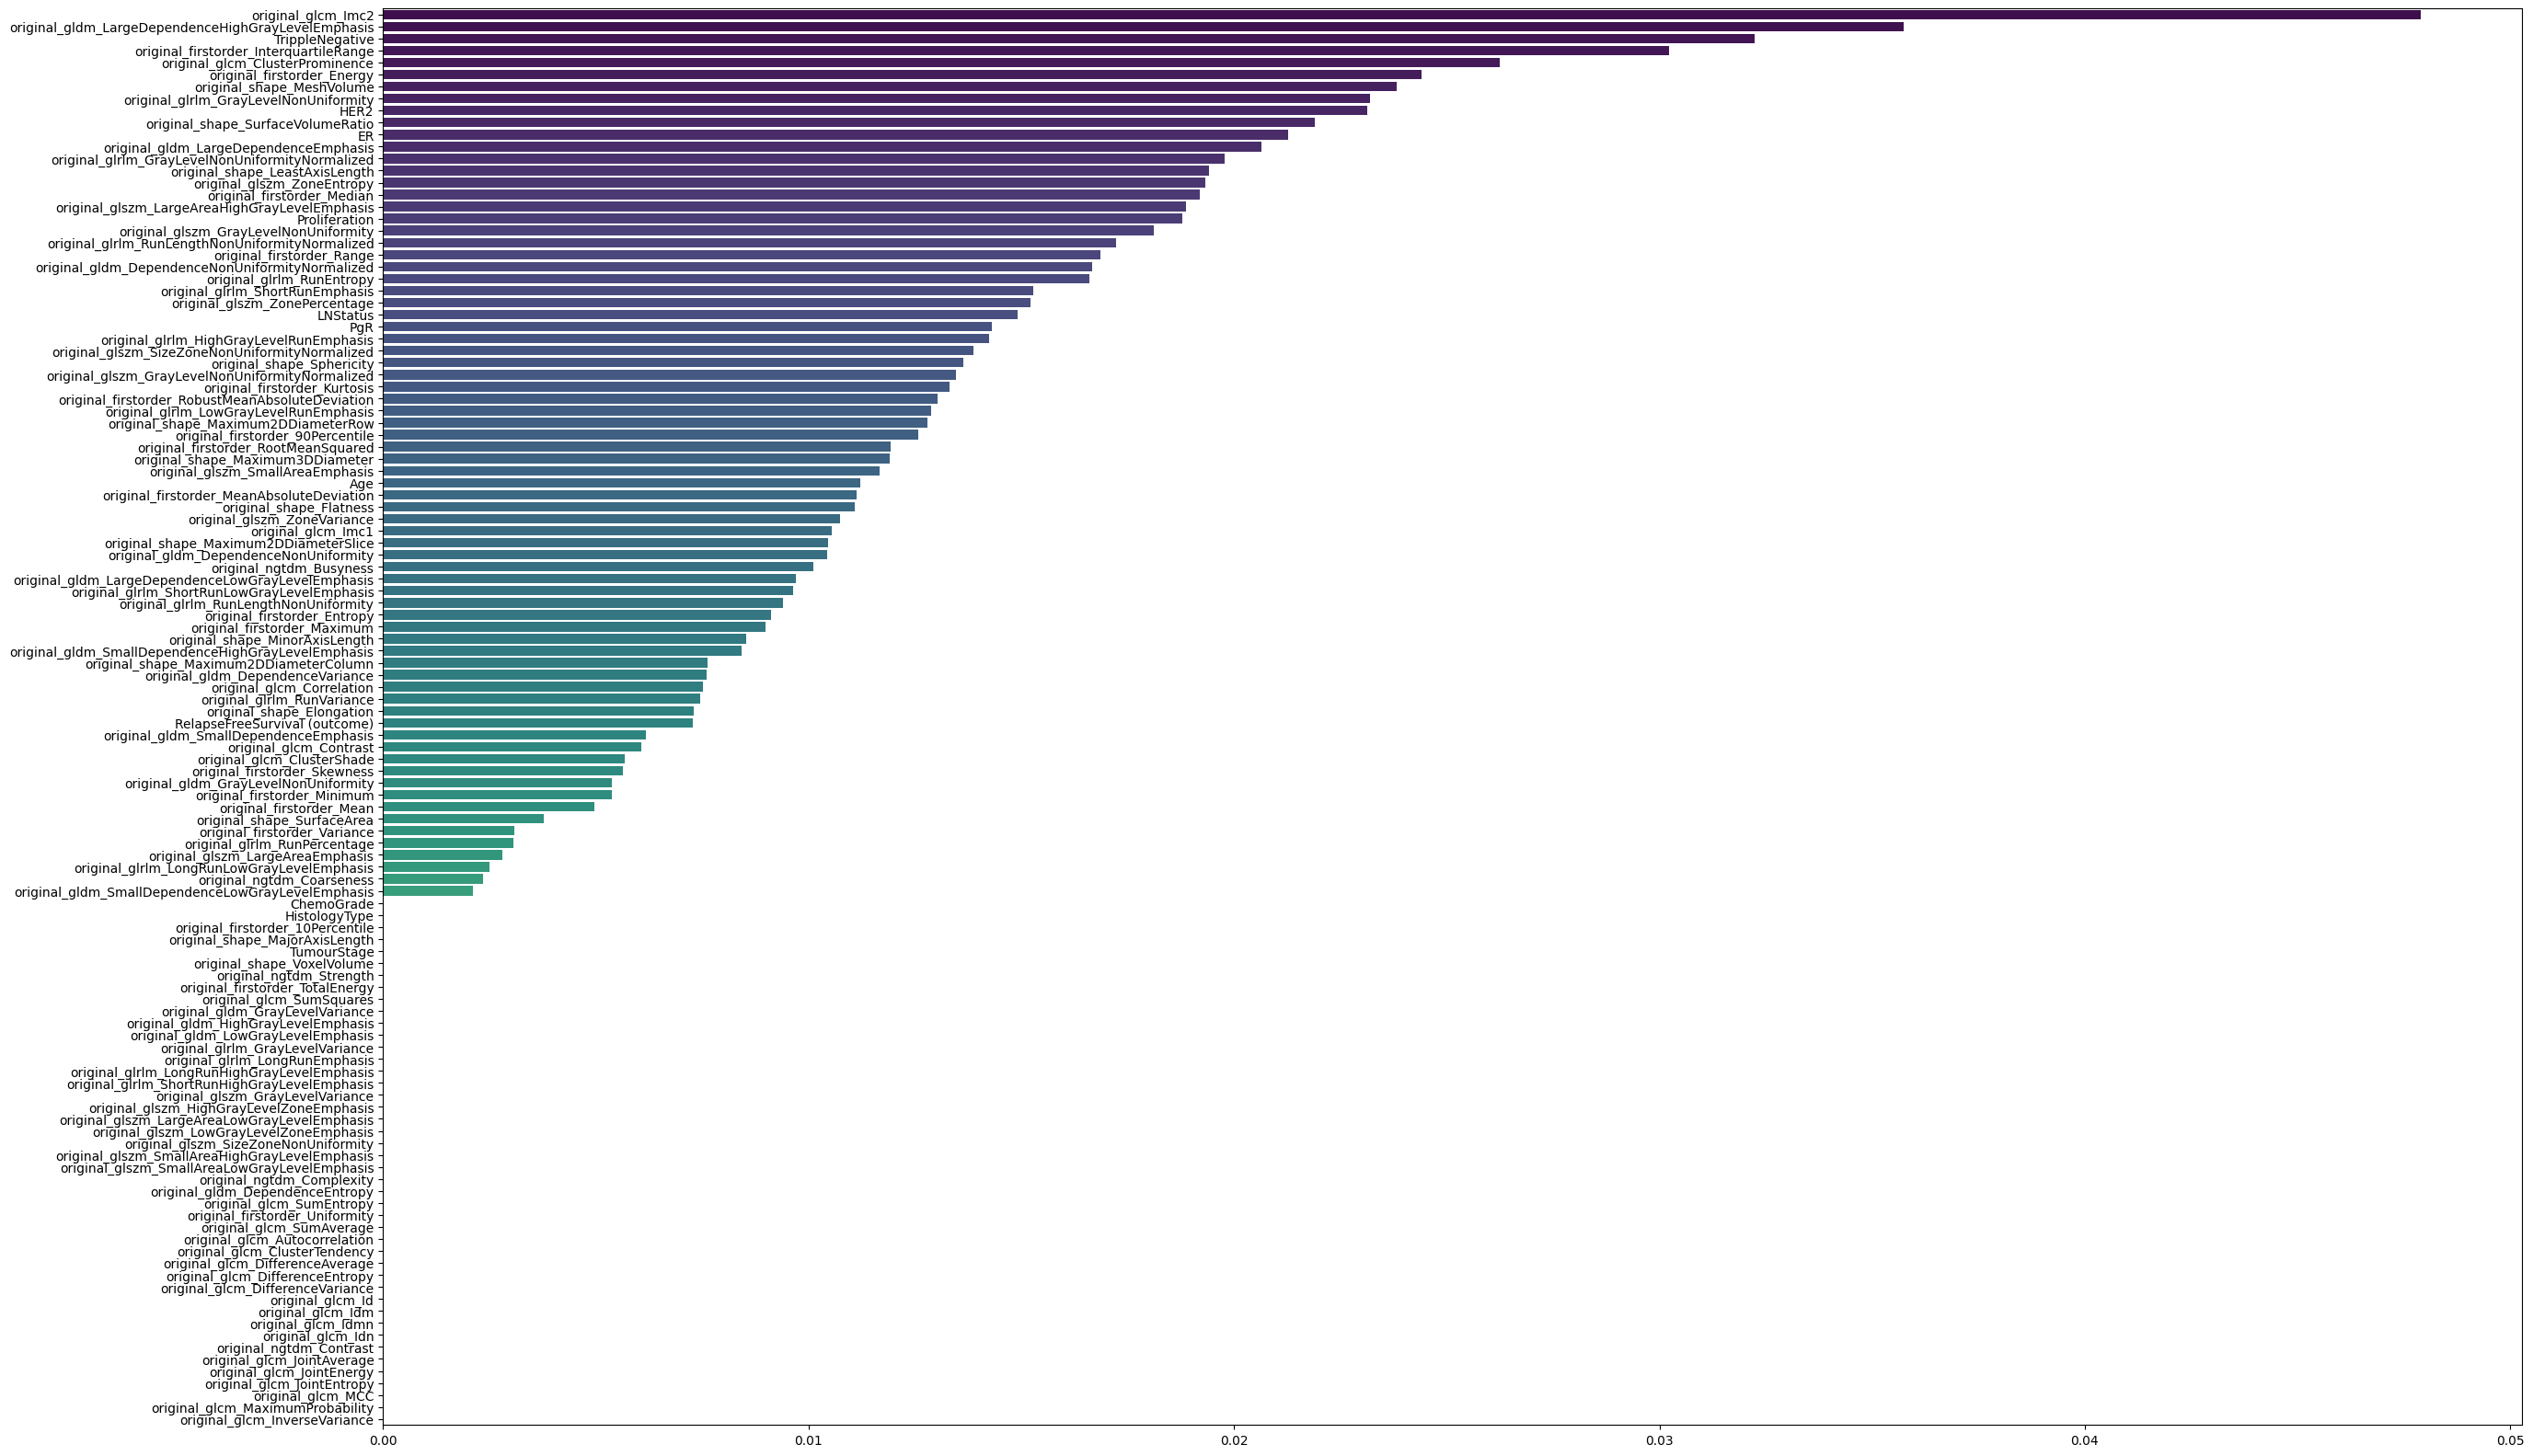

In [65]:
plt.figure(figsize=(30, 20))
sns.barplot(x=scores, y=feature_names, palette='viridis')

- HER2 seems to play the biggest role, with ER following then PgR (though it changes between HER2 and ER leading)
- TrippleNegative doesn't seem to play a big role in the predictions. This could be dropped perhaps?

In [65]:
from sklearn.model_selection import cross_val_score

k_range = range(2,11)
k_scores = []
k_dict = {}
for k in k_range:
    model = xgb.XGBClassifier(max_depth=k)
    scores = cross_val_score(model, df, pcr, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
    k_dict[k] = scores.mean()

key_with_highest_value = max(k_dict, key=lambda k: k_dict[k])

print(key_with_highest_value)

print(k_dict)

2
{2: 0.7550000000000001, 3: 0.7474999999999999, 4: 0.7375, 5: 0.7424999999999999, 6: 0.745, 7: 0.725, 8: 0.7375, 9: 0.7300000000000001, 10: 0.725}


Best depth for the xgb boost is 2. Let's see the feature importance with a random forest.

In [73]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(xtrain, ytrain)

RandomForestClassifier(random_state=42)

In [75]:
y_pred = rfc.predict(xtest)

In [76]:
acc = accuracy_score(ytest, y_pred)
print("Accuracy:", acc)

Accuracy: 0.7333333333333333


In [79]:
rf_importances = rfc.feature_importances_
rf_indices = np.argsort(rf_importances)[::-1]

<Axes: >

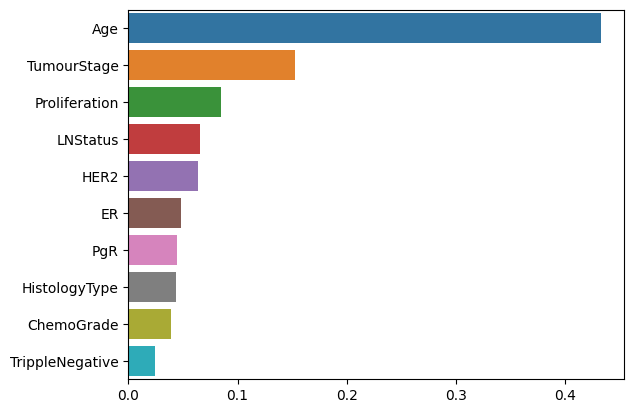

In [82]:
sns.barplot(x=rf_importances[rf_indices], y=[df.columns[i] for i in rf_indices])

Age plays a bigger role in the random forest, followed by tumour stage. tripple negative plays a very weak role.

In [ ]:
k_range = range(2,11)
k_scores = []
k_dict = {}
for k in k_range:
    model = xgb.XGBClassifier(max_depth=k)
    scores = cross_val_score(model, df, pcr, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
    k_dict[k] = scores.mean()

key_with_highest_value = max(k_dict, key=lambda k: k_dict[k])

print(key_with_highest_value)

print(k_dict)

# Adversarial Validation

Adversarial Validation is a technique used to assess the distribution differences between the training and testing datasets. Distributional shifts can lead to poor generalization on unseen data, which is very important. This technique is especially helpful where the test data is unseen, and unavailable to us in the model training proces

# Hypothesis Testing

**Hypo 1: Older patients are less likely to have a pCR due to old age.**   
Source: Initial thoughts

We will use odds ratio on a logistic regression to figure this out. The odds ratio is a measure of the strength of the association between two variables. 
- If the odds ratio is greater than 1, it means that older patients are more likely to not have a pCR than younger patients.
- If the odds ratio is less than 1, it means that older patients are less likely to not have a pCR than younger patients.

In [102]:
from sklearn.linear_model import LogisticRegression

# let's use logistic regression to test this.
# it would be good for me to understand the mathematics behind regression.
model = LogisticRegression()

# Fit the model to the data
model.fit(df[['Age']], df['pCR (outcome)'])

# Extract the coefficient for the age variable
# this is the multiplier for the age variable
age_coef = model.coef_[0][0]

# Exponentiate the coefficient to calculate the odds ratio
odds_ratio = np.exp(age_coef)

# Print the odds ratio
print(odds_ratio)

0.9992200925504726


The odds ratio is 0.9, however this doesn't nessecarily prove our hypothesis. I may need to revise this further.

In [35]:
pcr = df['pCR (outcome)'] # classification

In [54]:
# perhaps we can define age ranges
# 23 to 29
# 30 to 35
# 36 to 40
# 41 to 45
# 46 to 50
# 51

# filtered_df = df[(df['Age'] >= 50) & (df['Age'] <= 80)]

# # Plot the age counts using Seaborn
# sns.set(style="whitegrid")
# plt.figure(figsize=(20, 15))
# sns.barplot(x=filtered_df['Age'].value_counts().index, y=filtered_df['Age'].value_counts(), color='skyblue')

# # Set plot labels and title
# plt.xlabel('Age')
# plt.ylabel('Count')
# plt.title('Age Distribution')

# # Show the plot
# plt.show()

In [55]:
# drop target variables
df = df.drop('pCR (outcome)', axis=1)
df = df.drop('RelapseFreeSurvival (outcome)', axis=1)

In [63]:
df

,Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage
0,41.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,2.0
1,39.0,1.0,1.0,0.0,0.0,3.0,3.0,1.0,1.0,2.0
2,31.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,2.0
3,35.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,3.0
4,61.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...
395,58.5,1.0,0.0,1.0,0.0,3.0,2.0,1.0,1.0,4.0
396,34.3,0.0,0.0,0.0,1.0,3.0,3.0,1.0,0.0,2.0
397,53.3,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,2.0
398,68.8,1.0,0.0,0.0,0.0,3.0,3.0,1.0,1.0,3.0


In [64]:
# need to encode the features for the ML models, as they can't take non-integer values
labelEncoder = preprocessing.LabelEncoder()
df_encoded = df[df.columns].apply(labelEncoder.fit_transform)

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(df_encoded)

In [78]:
df = df.astype(int)
pcr = pcr.astype(int)

## Logistic Regression (PCR)

In [79]:
x_train, x_test, y_train, y_test = train_test_split(df, pcr, test_size= 0.3, random_state=42)

In [80]:
logist = LogisticRegression()

In [81]:
logist.fit(x_train, y_train)

LogisticRegression()

In [82]:
y_pred = logist.predict(x_test)

In [83]:
# calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(accuracy * 100, 2)}%')

Accuracy: 77.5%


Our baseline accuracy, without the columns that start with original, is 77.5%. An accuracy of >90% is too good to be true for this dataset (apparently).

In [84]:
# confusion matrix can help us see where the true/false positives and negatives are
confusion = confusion_matrix(y_test, y_pred)

In [86]:
# sns.set(font_scale=1.2)

# plt.figure(figsize=(6,6))

# labels = ['yes', 'no']

# sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues', annot_kws={"size":16}, xticklabels=labels, yticklabels=labels)

# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion matrix')

# plt.show()

In [16]:
df['pCR (outcome)'].value_counts()

pCR (outcome)
0      311
1       84
999      5
Name: count, dtype: int64

999 means missing data. There's more negatives than positives so that means the model may skew to predict negatives better than positives. Gradient boosting would be a good way to solve this.

In [17]:
df.isnull().sum()

ID                               0
pCR (outcome)                    0
RelapseFreeSurvival (outcome)    0
Age                              0
ER                               0
                                ..
original_ngtdm_Busyness          0
original_ngtdm_Coarseness        0
original_ngtdm_Complexity        0
original_ngtdm_Contrast          0
original_ngtdm_Strength          0
Length: 120, dtype: int64